<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Week%201/Google%20Colab/Tugas_Week_1_Classification_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.impute import SimpleImputer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
from tabulate import tabulate

# Classification Model

## Data Exploring

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/income.csv')

In [ ]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,47592.000000,4.759200e+04,47592.000000,47592.00000,47592.000000,47592.000000
mean,38.644541,1.897310e+05,10.091444,1091.80253,87.907022,40.602895
std,13.557307,1.055717e+05,2.567580,7489.46073,404.127864,12.259716
min,17.000000,1.228500e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.175848e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.782820e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.377130e+05,12.000000,0.00000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.00000,4356.000000,99.000000


In [ ]:
data['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

## Pre-processing Data

In [ ]:
data['income'] = data['income'].astype(str).str.replace('.', '')

In [ ]:
encoder = LabelEncoder()

data['workclass'] = encoder.fit_transform(data['workclass'])
data['education'] = encoder.fit_transform(data['education'])
data['marital-status'] = encoder.fit_transform(data['marital-status'])
data['occupation'] = encoder.fit_transform(data['occupation'])
data['relationship'] = encoder.fit_transform(data['relationship'])
data['race'] = encoder.fit_transform(data['race'])
data['sex'] = encoder.fit_transform(data['sex'])
data['native-country'] = encoder.fit_transform(data['native-country'])
data['income'] = encoder.fit_transform(data['income'])

In [ ]:
data.select_dtypes(include=np.number).corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.019270,-0.075777,-0.009854,0.033141,-0.265027,-0.014982,-0.259448,0.027789,0.086760,0.077999,0.057736,0.079061,-0.002324,0.231951
workclass,0.019270,1.000000,-0.020947,0.018349,0.041320,-0.052881,0.196587,-0.080481,0.055397,0.085464,0.033033,0.011119,0.114817,-0.004803,0.035940
fnlwgt,-0.075777,-0.020947,1.000000,-0.026022,-0.040974,0.030274,-0.001098,0.009519,-0.027212,0.028271,-0.003896,-0.004958,-0.016143,-0.050941,-0.007726
education,-0.009854,0.018349,-0.026022,1.000000,0.356711,-0.039854,-0.022214,-0.011974,0.013634,-0.027266,0.029586,0.017961,0.057942,0.066503,0.081259
education-num,0.033141,0.041320,-0.040974,0.356711,1.000000,-0.068859,0.105001,-0.090376,0.031218,0.007754,0.125609,0.081796,0.143913,0.061921,0.332980
marital-status,-0.265027,-0.052881,0.030274,-0.039854,-0.068859,1.000000,-0.005848,0.185554,-0.069779,-0.126554,-0.043059,-0.034127,-0.184608,-0.021625,-0.196640
occupation,-0.014982,0.196587,-0.001098,-0.022214,0.105001,-0.005848,1.000000,-0.067567,0.004752,0.069838,0.022012,0.017611,0.060646,-0.007484,0.066585
relationship,-0.259448,-0.080481,0.009519,-0.011974,-0.090376,0.185554,-0.067567,1.000000,-0.117834,-0.581571,-0.056700,-0.057015,-0.253057,-0.004624,-0.253330
race,0.027789,0.055397,-0.027212,0.013634,0.031218,-0.069779,0.004752,-0.117834,1.000000,0.087803,0.011942,0.017965,0.040663,0.133851,0.071092
sex,0.086760,0.085464,0.028271,-0.027266,0.007754,-0.126554,0.069838,-0.581571,0.087803,1.000000,0.047312,0.045520,0.230082,-0.009453,0.215346


In [ ]:
X = data.select_dtypes(include=np.number).drop('income', axis=1)
y = data['income']

In [ ]:
y.unique()

array([0, 1])

In [ ]:
np.unique(y).size

2

In [ ]:
# Buat objek SMOTE
smote = SMOTE(sampling_strategy={0: 100000, 1: 100000}, random_state=42)

# Terapkan ke X_train dan y_train
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

In [ ]:
y_test.head(20)

,income
49673,0
171551,1
5506,0
38370,0
36930,0
167783,1
67487,0
101486,0
131774,1
48246,0


In [ ]:
X_train.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,160000.000000,160000.000000,1.600000e+05,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000,160000.000000
mean,40.029644,3.783494,1.896209e+05,10.189588,10.321813,2.264606,6.540006,0.976200,3.638688,0.623144,2071.713313,121.806681,42.045262,37.090256
std,11.499429,1.192420,1.043824e+05,3.098351,2.287399,1.184973,3.576789,1.361537,0.811492,0.484600,10544.109327,470.919427,10.331315,6.240248
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,32.000000,4.000000,1.183115e+05,9.000000,9.000000,2.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,40.000000,4.000000,1.777800e+05,11.000000,10.000000,2.000000,6.000000,0.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,2.367692e+05,12.000000,12.000000,3.000000,10.000000,2.000000,4.000000,1.000000,0.000000,0.000000,47.000000,39.000000
max,90.000000,8.000000,1.486071e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

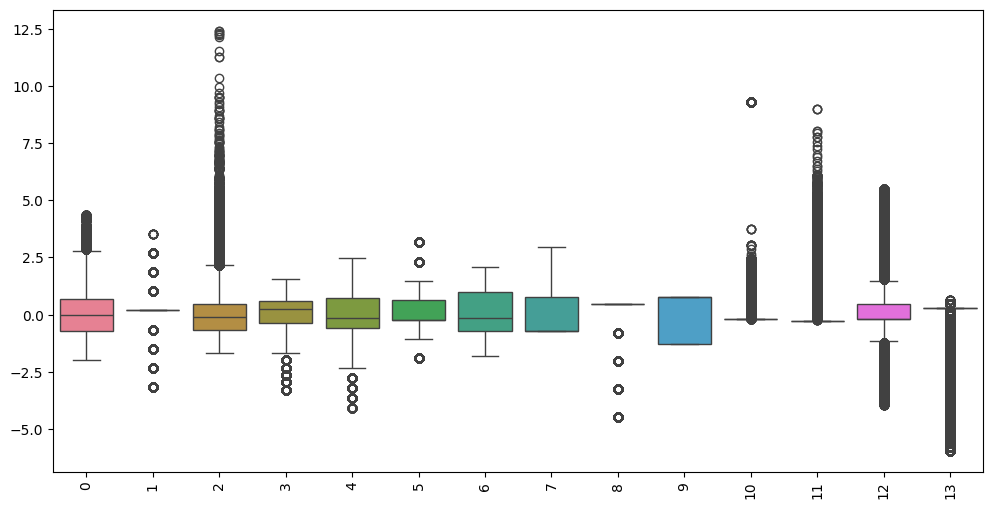

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.show()

In [ ]:
y_train.shape

(160000,)

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

#Training with TensorFLow

In [ ]:
X_train.shape

(160000, 14)

In [ ]:
y_train.dtype

dtype('int64')

In [ ]:
print(np.isnan(X_train).sum(), np.isnan(X_test).sum())  # Cek NaN
print(np.min(X_train), np.max(X_train))  # Cek rentang nilai

print(np.isnan(y_train).sum(), np.isnan(y_test).sum())  # Cek NaN
print(np.min(y_train), np.max(y_train))  # Cek rentang nilai

0 0
-5.943733989437155 12.420241241539705
0 0
0 1


In [ ]:
y_test

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_train: [0 1]
Unique values in y_test: [0 1]


In [ ]:
Counter(y_train)

Counter({0: 79738, 1: 80262})

In [ ]:
inputs = tf.keras.Input(shape=(14,))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

tf_model = tf.keras.Model(inputs, outputs)

# Compile model
tf_model.compile(
    optimizer='adam',  # Bisa dicoba lebih kecil/lainnya
    loss='binary_crossentropy',
    metrics=['accuracy']
)

tf_model.fit(
    X_train, y_train,
    validation_split=0.15,
    batch_size=128,  # Bisa dicoba 32 atau 128 juga
    epochs=100,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]
)

# Prediksi
y_pred_probs = tf_model.predict(X_test)  # Probabilitas output
y_pred = (y_pred_probs > 0.5).astype(int)  # Konversi ke kelas

Epoch 1/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8191 - loss: 0.3923 - val_accuracy: 0.8376 - val_loss: 0.3535
Epoch 2/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8447 - loss: 0.3434 - val_accuracy: 0.8412 - val_loss: 0.3488
Epoch 3/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8484 - loss: 0.3364 - val_accuracy: 0.8430 - val_loss: 0.3444
Epoch 4/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8517 - loss: 0.3289 - val_accuracy: 0.8452 - val_loss: 0.3385
Epoch 5/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8544 - loss: 0.3240 - val_accuracy: 0.8469 - val_loss: 0.3357
Epoch 6/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8579 - loss: 0.3152 - val_accuracy: 0.8498 - val_loss: 0.3293
Epoch 7/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8589 - loss: 0.3130 - val_accuracy: 0.8505 - val_loss: 0.3305
Epoch 8/100
1063/1063 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8638 - loss: 

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

tf_acc = accuracy_score(y_test, y_pred)
tf_prec = precision_score(y_test, y_pred)
tf_rec = recall_score(y_test, y_pred)
tf_f1 = f1_score(y_test, y_pred)
tf_auc = roc_auc_score(y_test, y_pred_probs)  # Tanpa multi_class='ovr'

# print(f"Accuracy: {acc:.4f}")
# print(f"Precision: {prec:.4f}")
# print(f"Recall: {rec:.4f}")
# print(f"F1-score: {f1:.4f}")
# print(f"AUC: {auc:.4f}")


[[17504  2758]
 [ 2507 17231]]


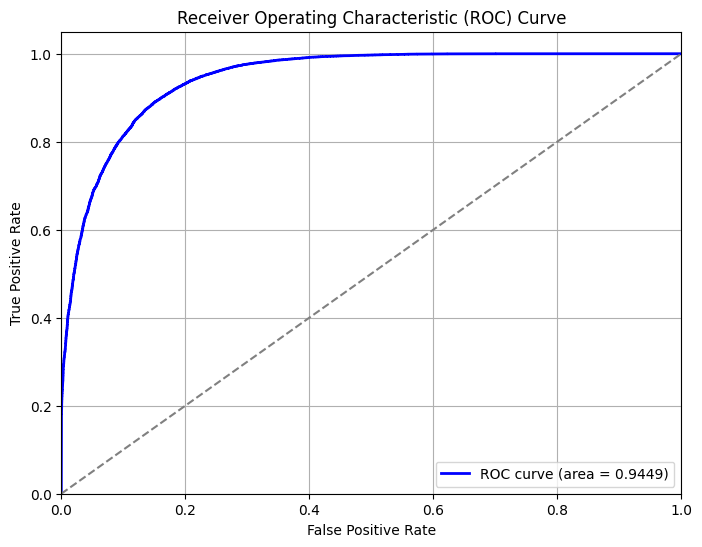

In [ ]:
# Hitung ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
print(y_test.shape)  # Harusnya (jumlah_sample,)
print(y_pred.shape)  # Harusnya (jumlah_sample,)


(40000,)
(40000, 1)


In [ ]:
df_results = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred.ravel()})
print(df_results.head(30))

    True Label  Predicted Label
0            0                0
1            1                1
2            0                0
3            0                1
4            0                0
5            1                1
6            0                0
7            0                0
8            1                0
9            0                0
10           1                1
11           0                0
12           0                0
13           1                0
14           1                1
15           0                0
16           1                1
17           1                1
18           1                1
19           1                1
20           1                0
21           0                0
22           0                0
23           1                1
24           0                1
25           1                0
26           1                1
27           0                0
28           1                1
29           0                0


# Training With PyTorch



In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.layer1 = nn.Linear(14, 128)
    self.layer2 = nn.Linear(128, 64)
    self.out = nn.Linear(64, 1)

  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = torch.sigmoid(self.out(x))
    return x

net = Net()

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.0005)
criterion = nn.BCELoss()

In [ ]:
# DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Early Stopping Setup
best_loss = float('inf')
patience = 5
counter = 0

train_losses = []
val_losses = []

for epoch in range(100):
    net.train()  # Set mode training
    total_train_loss = 0

    for x, target in train_loader:
        optimizer.zero_grad()
        output = net(x)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)  # Simpan train loss

    # === EVALUASI PADA VALIDATION SET ===
    net.eval()  # Set mode evaluasi
    total_val_loss = 0

    with torch.no_grad():  # Matikan autograd saat evaluasi
        for x_val, target_val in test_loader:  # Gunakan validation loader
            output_val = net(x)
            loss_val = criterion(output, target)
            total_val_loss += loss_val.item()

    avg_val_loss = total_val_loss / len(test_loader)
    val_losses.append(avg_val_loss)  # Simpan validation loss

    print(f"Epoch {epoch+1}: Train Loss = {avg_train_loss:.6f}, Val Loss = {avg_val_loss:.6f}")

    # Early Stopping
    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

Epoch 1: Train Loss = 0.370226, Val Loss = 0.312265
Epoch 2: Train Loss = 0.349714, Val Loss = 0.354741
Epoch 3: Train Loss = 0.342710, Val Loss = 0.305742
Epoch 4: Train Loss = 0.338095, Val Loss = 0.457217
Epoch 5: Train Loss = 0.334357, Val Loss = 0.329192
Epoch 6: Train Loss = 0.331245, Val Loss = 0.289602
Epoch 7: Train Loss = 0.329824, Val Loss = 0.328038
Epoch 8: Train Loss = 0.326565, Val Loss = 0.280651
Epoch 9: Train Loss = 0.323907, Val Loss = 0.278627
Epoch 10: Train Loss = 0.321049, Val Loss = 0.387576
Epoch 11: Train Loss = 0.318662, Val Loss = 0.325923
Epoch 12: Train Loss = 0.316553, Val Loss = 0.230723
Epoch 13: Train Loss = 0.314628, Val Loss = 0.294873
Epoch 14: Train Loss = 0.312897, Val Loss = 0.234579
Epoch 15: Train Loss = 0.311171, Val Loss = 0.381468
Epoch 16: Train Loss = 0.309611, Val Loss = 0.139248
Epoch 17: Train Loss = 0.308207, Val Loss = 0.397558
Epoch 18: Train Loss = 0.306363, Val Loss = 0.291750
Epoch 19: Train Loss = 0.304641, Val Loss = 0.263906
Ep

In [ ]:
# Evaluation
net.eval()  # **PENTING: Set mode evaluasi**
total_loss = 0

y_preds = []
y_actuals = []

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

with torch.no_grad():  # **Matikan autograd saat evaluasi**
    for x, target in test_loader:
        output = net(x)
        y_preds.extend(output.numpy().flatten())  # Simpan hasil prediksi
        y_actuals.extend(target.numpy().flatten())  # Simpan nilai aktual

y_preds = np.array(y_preds)
y_actuals = np.array(y_actuals)

In [ ]:
# Konversi probabilitas ke label biner (0 atau 1) dengan threshold 0.5
y_preds_label = (y_preds > 0.5).astype(int)

# Hitung metrik evaluasi
torch_accuracy = accuracy_score(y_actuals, y_preds_label)
torch_precision = precision_score(y_actuals, y_preds_label)
torch_recall = recall_score(y_actuals, y_preds_label)
torch_f1 = f1_score(y_actuals, y_preds_label)
torch_auc = roc_auc_score(y_actuals, y_preds)

# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"AUC: {auc:.4f}")


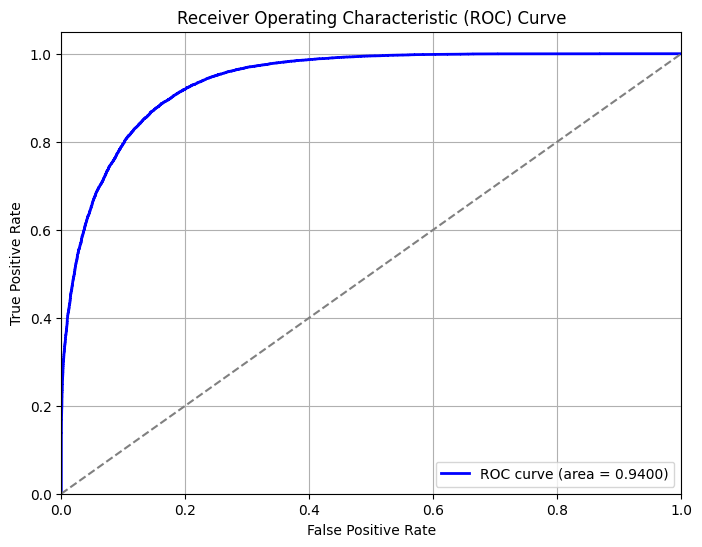

In [ ]:
# Hitung ROC curve
fpr, tpr, _ = roc_curve(y_actuals, y_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Konversi hasil prediksi ke label biner (0 atau 1)
y_preds_label = (y_preds > 0.5).astype(int)

# Buat DataFrame untuk melihat perbandingan
df_compare = pd.DataFrame({
    "y_actual": y_actuals,
    "y_pred_prob": y_preds,  # Probabilitas dari model
    "y_pred_label": y_preds_label  # Label prediksi setelah thresholding
})

print(df_compare.head(10))  # Tampilkan 10 sampel pertama


   y_actual  y_pred_prob  y_pred_label
0       0.0     0.005129             0
1       1.0     0.995991             1
2       0.0     0.000006             0
3       0.0     0.652830             1
4       0.0     0.373508             0
5       1.0     0.910883             1
6       0.0     0.000471             0
7       0.0     0.004981             0
8       1.0     0.348208             0
9       0.0     0.493931             0


# Result Classification Model

In [ ]:
# Data hasil evaluasi model
data = [
    ["Accuracy", tf_acc, torch_accuracy],
    ["Precision", tf_prec, torch_precision],
    ["Recall", tf_rec, torch_recall],
    ["F1 Score", tf_f1, torch_f1],
    ["AUC", tf_auc, torch_auc]
]

# Buat tabel
headers = ["Metric", "TensorFlow", "PyTorch"]
table = tabulate(data, headers=headers, tablefmt="grid")

print(table)

+-----------+--------------+-----------+
| Metric    |   TensorFlow |   PyTorch |
+===========+==============+===========+
| Accuracy  |     0.868375 |  0.86105  |
+-----------+--------------+-----------+
| Precision |     0.862024 |  0.829339 |
+-----------+--------------+-----------+
| Recall    |     0.872986 |  0.90455  |
+-----------+--------------+-----------+
| F1 Score  |     0.86747  |  0.865313 |
+-----------+--------------+-----------+
| AUC       |     0.944918 |  0.94005  |
+-----------+--------------+-----------+


# Description Classification

## 📌 Persamaan Matematika dan Perbandingan Model

### 🔢 Persamaan Metrik Evaluasi

#### 1️⃣ Accuracy
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$
Mengukur seberapa sering model memprediksi dengan benar.

#### 2️⃣ Precision
$$
Precision = \frac{TP}{TP + FP}
$$
Menunjukkan berapa banyak dari prediksi positif yang benar.

#### 3️⃣ Recall (Sensitivity)
$$
Recall = \frac{TP}{TP + FN}
$$
Mengukur seberapa banyak sampel positif yang berhasil dideteksi oleh model.

#### 4️⃣ F1 Score
$$
F1\ Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$
Merupakan rata-rata harmonik antara Precision dan Recall.

#### 5️⃣ AUC (Area Under Curve)
AUC mengukur area di bawah kurva **ROC (Receiver Operating Characteristic)** dan menunjukkan seberapa baik model membedakan antara kelas positif dan negatif.

---

### 📊 Perbandingan Model (TensorFlow vs PyTorch)

| **Metric**    | **TensorFlow** | **PyTorch** | **Model Lebih Baik** |
|--------------|--------------|------------|----------------|
| **Accuracy**  | 0.868375     | 0.86105    | **TensorFlow** (lebih tinggi) |
| **Precision** | 0.862024     | 0.829339   | **TensorFlow** (lebih tinggi) |
| **Recall**    | 0.872986     | 0.90455    | **PyTorch** (lebih tinggi) |
| **F1 Score**  | 0.86747      | 0.865313   | **TensorFlow** (lebih tinggi) |
| **AUC**       | 0.944918     | 0.94085    | **TensorFlow** (lebih tinggi) |

📌 **Kesimpulan**:
- **TensorFlow lebih baik** dalam **Accuracy, Precision, F1 Score, dan AUC**.
- **PyTorch lebih baik** dalam **Recall**, yang berarti lebih sensitif terhadap kelas positif.
- **Secara keseluruhan, TensorFlow memiliki performa yang lebih baik dibandingkan PyTorch** karena memiliki keunggulan dalam **lebih banyak metrik**.
